## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Read Data

In [2]:
stock_ctlt = pd.read_csv('CTLT.csv')
stock_ctlt

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
1,2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2,2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
3,2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
4,2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...,...
1114,2023-06-06,37.910000,39.049999,37.580002,38.820000,38.820000,2261700
1115,2023-06-07,39.160000,40.029999,38.250000,39.959999,39.959999,4382500
1116,2023-06-08,39.700001,39.840000,36.750000,39.000000,39.000000,9705500
1117,2023-06-09,39.250000,40.110001,38.480000,38.810001,38.810001,4493800


## Analyst

### Describe

In [3]:
stock_ctlt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1.119000e+03
mean,80.071323,81.264071,78.774144,80.051233,80.051233,1.451844e+06
std,30.077890,30.372008,29.679122,30.002664,30.002664,1.912181e+06
min,30.049999,30.660000,29.290001,29.840000,29.840000,2.197000e+05
25%,50.935000,51.800001,50.379999,51.329999,51.329999,7.148000e+05
50%,78.260002,79.400002,77.220001,78.550003,78.550003,1.004100e+06
75%,105.935001,107.257503,104.104999,106.025002,106.025002,1.475700e+06
max,142.639999,142.639999,140.779999,142.350006,142.350006,3.083880e+07


### Visualization

#### Histogram

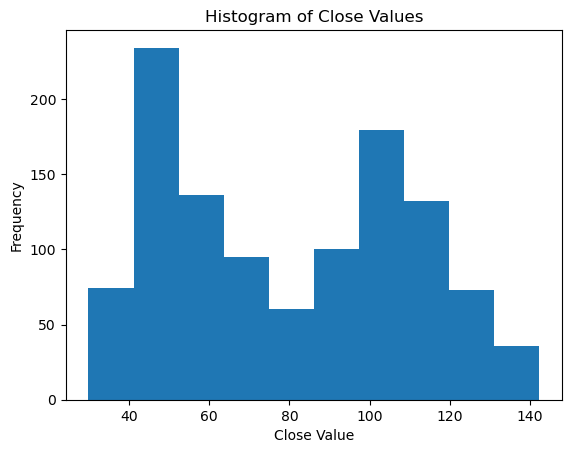

In [4]:
plt.hist(stock_ctlt['Close'])

plt.title("Histogram of Close Values")
plt.xlabel("Close Value")
plt.ylabel("Frequency")

plt.show()

#### Boxplot

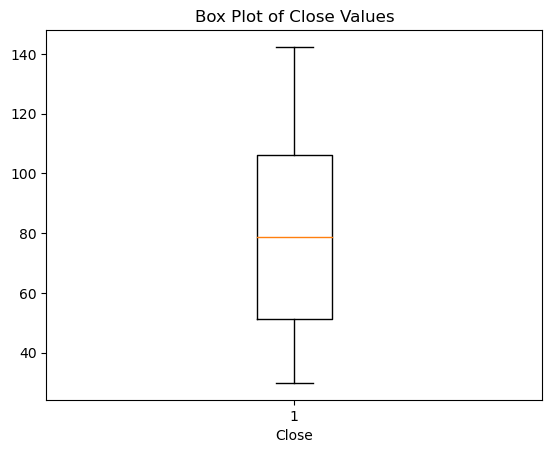

In [5]:
plt.boxplot(stock_ctlt['Close'])

plt.title("Box Plot of Close Values")
plt.xlabel("Close")

plt.show()

#### Visualizing the components of our time series: Trend, Seasonality, and Noise

In [6]:
# Convert the 'Date' column to datetime format
stock_ctlt['Date'] = pd.to_datetime(stock_ctlt['Date'])

# Set the 'Date' column as the index value
stock_ctlt = stock_ctlt.set_index(pd.DatetimeIndex(stock_ctlt['Date'].values))

# Delete Date from Dataframe
stock_ctlt = stock_ctlt.drop('Date', axis=1)

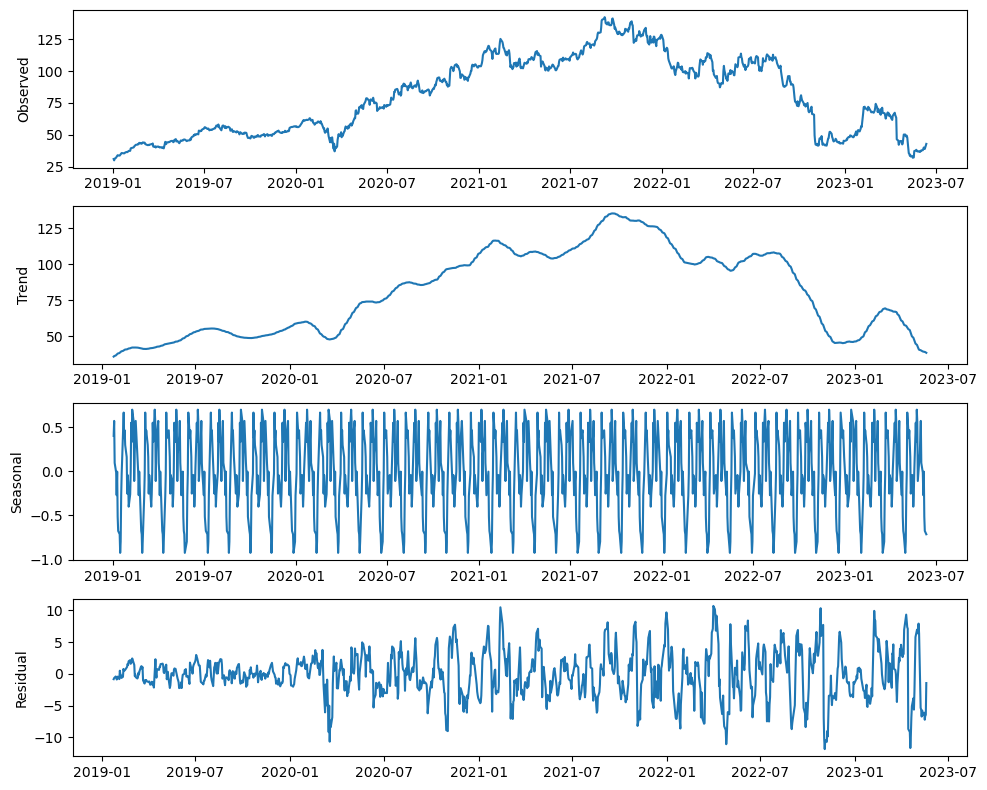

In [7]:
decomposition = sm.tsa.seasonal_decompose(stock_ctlt['Close'], model='add', period=30)

# Plotting the components
fig, ax = plt.subplots(4,1, figsize=(10,8))
ax[0].plot(decomposition.observed)
ax[0].set_ylabel('Observed')
ax[1].plot(decomposition.trend)
ax[1].set_ylabel('Trend')
ax[2].plot(decomposition.seasonal)
ax[2].set_ylabel('Seasonal')
ax[3].plot(decomposition.resid)
ax[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()

#### Initial Close Values

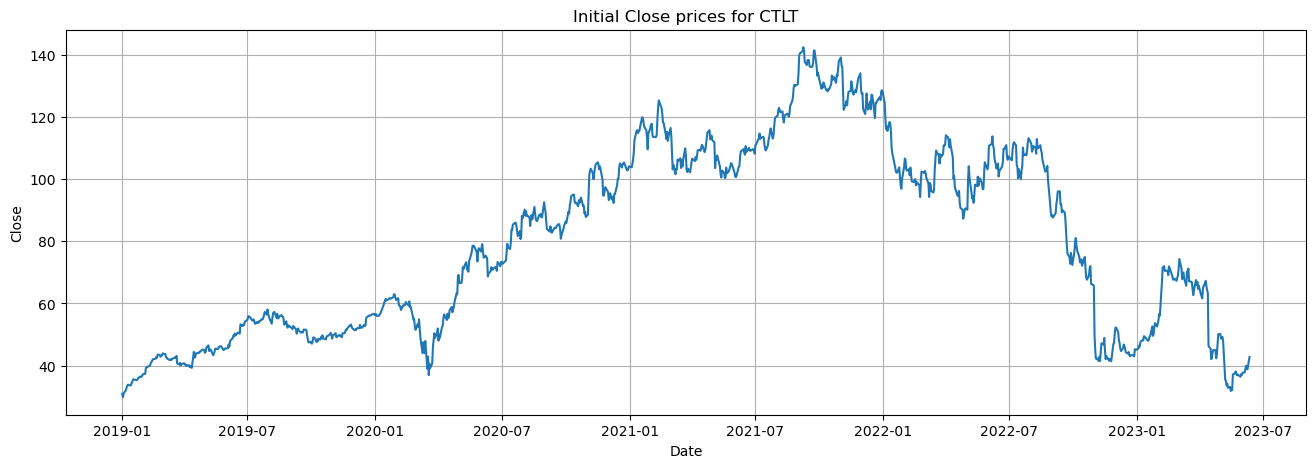

In [8]:
plt.figure(figsize=(16,5))

plt.plot(stock_ctlt.index, stock_ctlt['Close'])

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Initial Close prices for CTLT')
plt.grid()
plt.show()